# Cleaning the NHANES diabetes data

[DSLC stages]: Data cleaning and pre-processing


Start by loading in any libraries that you will use in this document.


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

from functions.load_diabetes_data import load_diabetes_data
from functions.data_clean import get_clean_data
from functions.data_process import get_process_data

pd.set_option('display.max_columns', None)


## Domain problem formulation

 Generate a binary prediction algorithm that can predict when a patient is at risk of diabetes





## Data source overview

The National Health and Nutrition Examination Survey (NHANES) 2013-2014 is a comprehensive program designed to assess the health and nutritional status of both adults and children in the United States. This survey is distinctive in its combination of interviews and physical examinations to gather data. Managed by the National Center for Health Statistics (NCHS), part of the Centers for Disease Control and Prevention (CDC), NHANES has been a crucial tool for producing vital health statistics since its inception in the early 1960s.

The survey includes a diverse range of health topics, adapting over time to address emerging health concerns. In 1999, NHANES transitioned to a continuous program that annually examines a representative sample of about 5,000 individuals across the nation. This sample is drawn from 15 different counties each year, ensuring broad geographic coverage.

The NHANES process involves both demographic and health-related interviews, as well as physical exams that include medical, dental, and physiological assessments, alongside laboratory tests. The findings from NHANES are critical for determining the prevalence of diseases and risk factors, which in turn inform public health initiatives and policies aimed at improving health outcomes across the U.S.


## Step 1: Review background information {#sec-bg-info}

### Information on data collection

The National Health and Nutrition Examination Survey (NHANES) 2013-2014 data was collected through a combination of interviews and physical examinations. A representative sample of about 5,000 people from 15 U.S. counties was surveyed each year. Interviews gathered information on demographics, health behaviors, and dietary habits, while physical exams included measurements like height, weight, blood pressure, and lab tests on biological samples (blood, urine). The data is used to assess the health and nutritional status of the U.S. population.

### Data dictionary

|feature|meaning|
|-------|-------|
|house_family_person_id|Combine of household number, family number and personal number, used to identify different person|
|diabetes|Ever been told that you have diabetes, predictive goal 1 or 0|
|age | age of person, integer|
|smoker| Ever smoked 100 cigarettes, 1 for yes, 2 for no|
|sex| gendar of person, 1 for male, 2 for female|
|coronary_heart_disease|Ever been told you had coronary heart disease, 1 for yes, 2 for no|
|weight|weight of person, integer|
|bmi|bmi of person, integer|
|height|height of person, interger|
|hypertension|Ever been told you have hypertension, 1 for yes, 2 for no|
|heart_condition|Ever been told you had a heart condition/disease, 1 for yes, 2 for no|
|cancer|Ever told by a doctor you had cancer |
|family_history_diabetes|Blood relative ever had diabetes, 1 for yes, 2 for no|

### Answering questions about the background information

Answer the recommended background information questions from the Data Cleaning chapter.

- *What does each variable measure?* 

- *How was the data collected?* 

- *What are the observational units?* 

- *Is the data relevant to my project?*




## Step 2: Loading in the data


Load in the data. 


In [2]:
diabetes_orig = load_diabetes_data()

Let's look at the first few rows to make sure it looks like it has been loaded in correctly:

In [3]:
diabetes_orig.head()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
0,1_2_1,0,24,2,2,0,125,2019,66,0,0,0,0
1,2_1_1,0,76,2,1,0,190,2727,70,1,0,0,0
2,3_1_2,0,36,2,2,0,225,3862,64,0,0,0,1
3,5_1_1,0,35,1,2,0,240,3995,65,0,0,0,1
4,10_1_5,0,20,2,2,0,103,1883,62,0,0,0,1


And let's examine the dimension of the data.


In [4]:
diabetes_orig.shape

(32499, 13)

That's a lot of data!



## Step 3: Examine the data

In this section we explore the common messy data traits to identify any cleaning action items.



In [5]:
diabetes_orig.head()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
0,1_2_1,0,24,2,2,0,125,2019,66,0,0,0,0
1,2_1_1,0,76,2,1,0,190,2727,70,1,0,0,0
2,3_1_2,0,36,2,2,0,225,3862,64,0,0,0,1
3,5_1_1,0,35,1,2,0,240,3995,65,0,0,0,1
4,10_1_5,0,20,2,2,0,103,1883,62,0,0,0,1


In [6]:
diabetes = diabetes_orig.copy()



### Finding invalid values



In [7]:
diabetes.sample(20)

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
19541,42713_1_1,0,20,1,2,0,115,2176,61,0,0,0,0
7232,16035_1_2,1,50,2,2,0,180,3513,60,1,0,0,1
5794,12938_1_2,0,60,2,2,0,198,3620,62,0,0,0,0
21924,47951_1_2,0,61,1,2,0,996,1834,96,1,0,0,0
17343,37916_1_1,0,28,2,1,0,150,2213,69,0,0,0,0
6138,13698_1_1,0,85,2,2,0,130,2100,66,0,0,0,0
30831,67824_1_1,0,56,1,1,0,237,3401,70,1,0,0,0
11160,24612_1_1,0,83,2,2,0,155,2659,64,0,1,1,1
3188,7020_1_1,0,47,2,2,0,165,2508,68,0,0,0,0
30889,67936_1_1,0,38,2,1,0,177,2859,66,0,0,0,0


`house_family_person_id` is invalid to predict since it just used to identify a person, so this column is dropped.

#### Numeric variables



In [8]:
diabetes.describe()

,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
count,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000
mean,0.107142,51.051017,1.608942,1.547494,0.055232,251.113850,3045.910736,68.817748,0.356042,0.089603,0.112865,0.354134
std,0.309298,18.511120,0.609761,0.497747,0.228437,240.280025,1451.552127,8.459210,0.478835,0.285616,0.316433,0.478257
min,0.000000,18.000000,1.000000,1.000000,0.000000,100.000000,1167.000000,59.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.000000,1.000000,1.000000,0.000000,150.000000,2374.000000,64.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,52.000000,2.000000,2.000000,0.000000,176.000000,2724.000000,67.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,66.000000,2.000000,2.000000,0.000000,214.000000,3173.000000,70.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,85.000000,9.000000,2.000000,1.000000,999.000000,9999.000000,99.000000,1.000000,1.000000,1.000000,1.000000


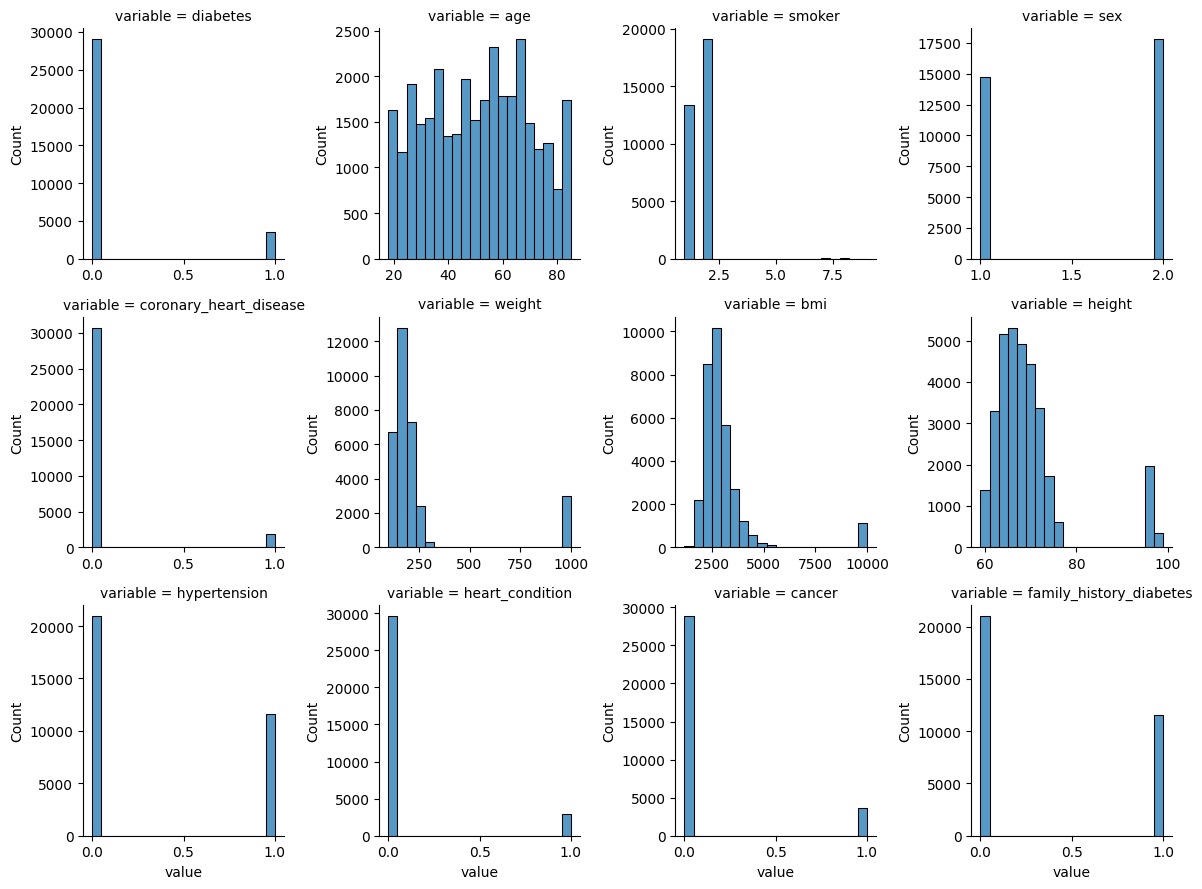

In [9]:
diabetes_numeric_long = diabetes.select_dtypes(include=np.number).melt()
g = sns.FacetGrid(diabetes_numeric_long, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, "value", bins=20)


|feature|process|
|-------|-------|
|diabetes|The value is already reasonable.|
|age|From the document of dataset, data on age older than 85 are all treated as 85, this may influence predictive ability, so the age 85 is removed|
|smoker|The value 6, 7, 8 indicates refused or unknown, etc. which is invalid to the predict, so they are removed.|
|sex|The value is already reasonable.|
|coronary_heart_disease|The value is already reasonable.|
|weight|From the document of dataset, the value $>$ 299 is invalid, so they are removed.|
|bmi|From the document and the graph, value $\ge$ 9995 is unreasonable, so they are removed.|
|height|From the document and the graph, value $\ge$ 96 us unreasonable, so they are removed.|
|hypertension|The value is already reasonable.|
|heart_condition|The value is already reasonable.|
|cancer|The value is already reasonable.|
|family_history_diabetes|The value is already reasonable.|

All the removements are treat in **judgement call**, which will be used in PCS evalution.

In [10]:
diabetes_clean = get_clean_data()

In [11]:
diabetes_clean.shape

(28451, 12)

In [12]:
diabetes_clean.describe()

,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
count,28451.000000,28451.000000,28451.000000,28451.000000,28451.000000,28451.000000,28451.000000,28451.000000,28451.000000,28451.000000,28451.000000,28451.000000
mean,0.101051,49.870163,1.584795,1.537204,0.050578,176.349900,2769.458859,66.825771,0.339847,0.083090,0.106886,0.352149
std,0.301401,17.688399,0.492766,0.498623,0.219139,39.205485,545.324719,3.898480,0.473666,0.276023,0.308973,0.477649
min,0.000000,18.000000,1.000000,1.000000,0.000000,100.000000,1522.000000,59.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.000000,1.000000,1.000000,0.000000,146.000000,2372.000000,64.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,51.000000,2.000000,2.000000,0.000000,172.000000,2682.000000,67.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,64.000000,2.000000,2.000000,0.000000,200.000000,3086.000000,70.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,84.000000,2.000000,2.000000,1.000000,299.000000,5287.000000,76.000000,1.000000,1.000000,1.000000,1.000000


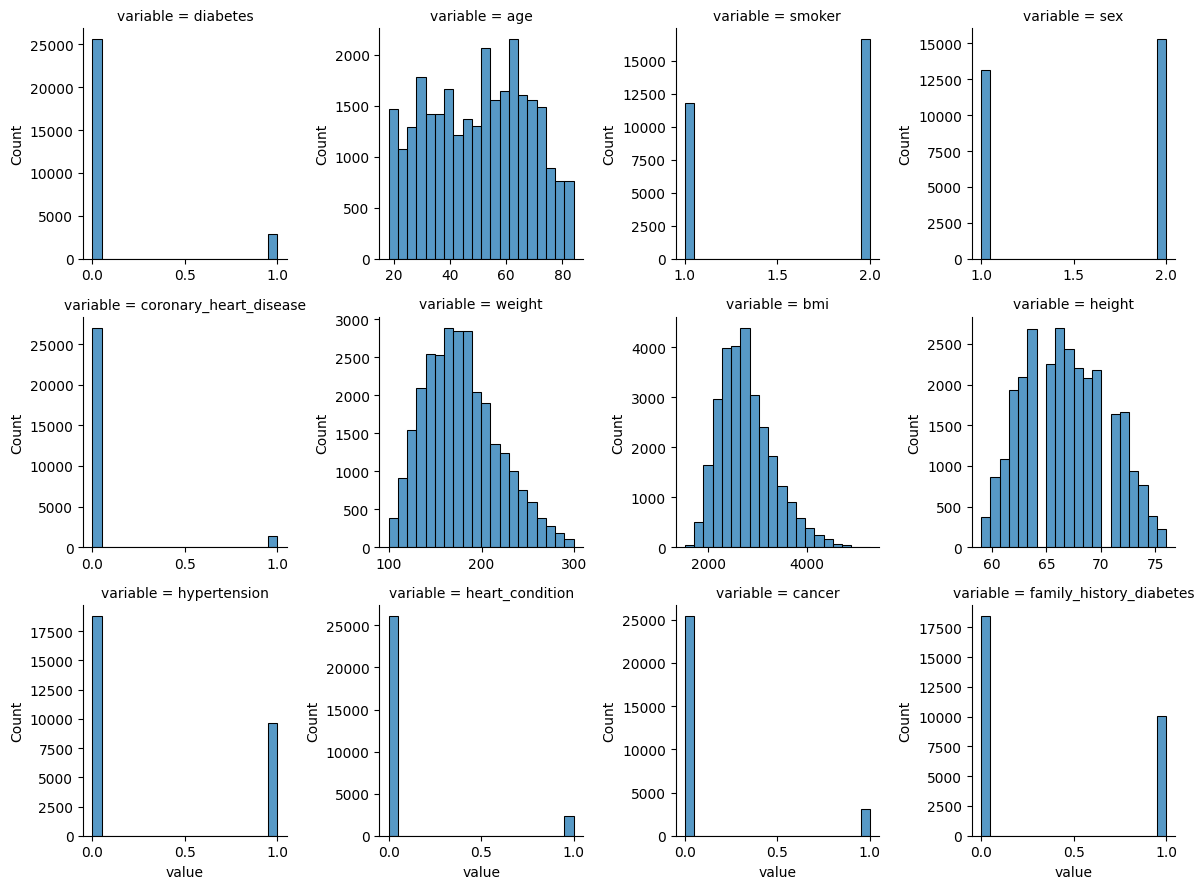

In [13]:
diabetes_clean_numeric_long = diabetes_clean.select_dtypes(include=np.number).melt()
g = sns.FacetGrid(diabetes_clean_numeric_long, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, "value", bins=20)

#### Categorical variables
From the dataset document, there are totally 8 categorical varibles: `diabetes, smoker, sex, coronary_heart_disease, hypertension, heart_condition, cancer, family_history_diabetes`.
Since we will use logistical regression to predict, we will transform these varibles to one-hot vectors expect diabetes.



In [14]:
diabetes_process = get_process_data()

In [15]:
diabetes_process.shape

(28451, 19)

In [16]:
diabetes_process.head()

,diabetes,age,weight,bmi,height,smoker_1,smoker_2,sex_1,sex_2,coronary_heart_disease_0,coronary_heart_disease_1,hypertension_0,hypertension_1,heart_condition_0,heart_condition_1,cancer_0,cancer_1,family_history_diabetes_0,family_history_diabetes_1
0,0,24,125,2019,66,False,True,False,True,True,False,True,False,True,False,True,False,True,False
1,0,76,190,2727,70,False,True,True,False,True,False,False,True,True,False,True,False,True,False
2,0,36,225,3862,64,False,True,False,True,True,False,True,False,True,False,True,False,False,True
3,0,35,240,3995,65,True,False,False,True,True,False,True,False,True,False,True,False,False,True
4,0,20,103,1883,62,False,True,False,True,True,False,True,False,True,False,True,False,False,True


### Examining missing values




In [17]:
diabetes_process.apply(lambda x : sum(x.isnull()))

diabetes                     0
age                          0
weight                       0
bmi                          0
height                       0
smoker_1                     0
smoker_2                     0
sex_1                        0
sex_2                        0
coronary_heart_disease_0     0
coronary_heart_disease_1     0
hypertension_0               0
hypertension_1               0
heart_condition_0            0
heart_condition_1            0
cancer_0                     0
cancer_1                     0
family_history_diabetes_0    0
family_history_diabetes_1    0
dtype: int64

There is no missing values.

### Examining the data format

The data is already in a "tidy" format.

### Assessing column names

All varibles are in lowercase, just replace '_' for ' '.

### Assessing variable type



### Evaluating data completeness





### Answering any unanswered questions







## Step 4: Prepare the data

Don't forget to split the data into training, validation and test sets before you clean and pre-process it!

In [18]:
%run functions/prepare_data.py

In [19]:
diabetes_train_default.shape

(22760, 19)

In [20]:
diabetes_val_default.shape

(5691, 19)

In [22]:
sum(diabetes_train_default['diabetes'] == 1) / diabetes_train_default.shape[0]

0.10105448154657294

In [ ]:
sum(diabetes_val_default['diabetes'] == 1) / diabetes_val_default.shape[0]